In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is A68D-66D8

 Directory of C:\Users\DHARMIK\Documents\my codes\Classifications

03-07-2019  13:18    <DIR>          .
03-07-2019  13:18    <DIR>          ..
03-07-2019  13:17    <DIR>          .ipynb_checkpoints
02-07-2019  22:49               775 description.txt
03-07-2019  13:18               555 Logistic Regression.ipynb
02-07-2019  22:46         1,580,520 MagicTelescope.csv
               3 File(s)      1,581,850 bytes
               3 Dir(s)  66,968,350,720 bytes free


In [50]:
df=pd.read_csv('MagicTelescope.csv')
df.head()

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [51]:
cols=list(map(lambda x:x.replace(':',''),df.columns))
df.columns=cols

In [61]:
df.drop('ID',inplace=True,axis=1)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [62]:
df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class         int32
dtype: object

In [63]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.351630
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,0.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [64]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

<h4> Encoding Labels</h4>

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['class'])
print(le.classes_)
df['class']=le.fit_transform(df['class'])

['g' 'h']


<h4>Plotting Feature dependencies </h4>

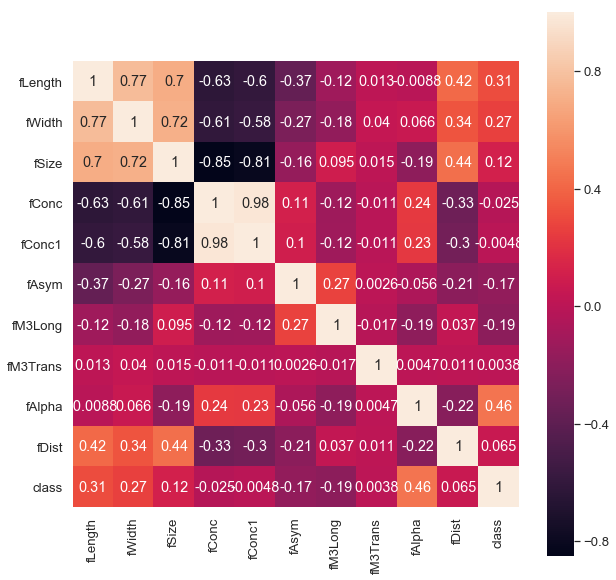

In [65]:
import seaborn as sns
fig=plt.subplots(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),square=True,cbar=True,annot=True)

In [66]:
df.shape

(19020, 11)

In [108]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<h3> Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(n_jobs=-1,solver='sag',verbose=5,max_iter=10000,fit_intercept=True)
logreg.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 8128 epochs took 68 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=5, warm_start=False)

In [122]:
y_pred=logreg.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7867157378198387

<h3> Gradient Boosting 

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.01,loss='deviance',verbose=1,max_depth=5)

In [128]:
gbc.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2879            4.49s
         2           1.2787            4.92s
         3           1.2696            4.84s
         4           1.2608            4.78s
         5           1.2522            4.76s
         6           1.2438            4.75s
         7           1.2355            4.70s
         8           1.2274            4.63s
         9           1.2195            4.59s
        10           1.2116            4.57s
        20           1.1409            3.99s
        30           1.0817            3.51s
        40           1.0312            3.03s
        50           0.9872            2.53s
        60           0.9486            2.00s
        70           0.9147            1.50s
        80           0.8849            1.00s
        90           0.8582            0.50s
       100           0.8342            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [129]:
gbc.score(x_test,y_test)

0.844900105152471

 <h3> Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

<h5> Doing a grid search to select best hyper-parameters

In [155]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [10,3,5],
    'max_features': [2, 3],
    'min_samples_split': [2,8],
    'n_estimators': [100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [156]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [10, 3, 5], 'max_features': [2, 3], 'min_samples_split': [2, 8], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

<h6> Best hyper-parameters

In [157]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [165]:
rf=RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=10,verbose=1,min_samples_split=2,max_features=3,bootstrap=True)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished


0.8671573781983877

Grid Search takes a lot of time if done extensively. The purpose here is just to show how to perform grid search.<br>
User can add other values as well as parameters if he/she wishes.<br>
<br>
Grid-Search can be applied to the above two algorithms as well i.e
<ul>
    <li>Logistic Regression </li>
    <li>Gradient Boosting</li>
</ul>